# Exploratory Visualisation with Tabular Data 🍫

Often our data lives in tables - in spreadsheets or in CSV files. In this notebook we will explore the tabular dataset [Chocolate Bar Ratings](https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings?resource=download) available on Kaggle.

The learning objectives for this activity are:

*   Open the dataset using pandas and examine variables
*   Summarise and clean dataset
*   Analyse distribution of Chocolate Ratings across the dataset

**About the Dataset**

This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

Flavors of Cacao Rating System:
* 5= Elite (Transcending beyond the ordinary limits)
* 4= Premium (Superior flavor development, character and style)
* 3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
* 2= Disappointing (Passable but contains at least one significant flaw)
* 1= Unpleasant (mostly unpalatable)
Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch. Batch numbers, vintages and review dates are included in the database when known.

More information about the dataset can be found [here](https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings?resource=download)

**Acknowledgements**

These ratings were compiled by Brady Brelinski, Founding Member of the Manhattan Chocolate Society. For up-to-date information, as well as additional content (including interviews with craft chocolate makers), please see his website: Flavors of Cacao

However, we can use the [pandas](https://pandas.pydata.org) package to work with tabular data in a more convenient way.


## Pandas

We will use pandas to achieve our learning objectives. You will have already been introduced to Pandas in the previous session.



In [19]:
# read in the data

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/johnpinney/irc_viz/main/flavors_of_cacao.csv')

In [20]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [21]:
# check for na values
df[df.isna().any(axis=1)] # display rows with one or more na values

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [22]:
df.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [23]:
# format the variables
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].apply(lambda x: x.strip('%')).astype('float64')

### Q1: How many ratings have been collected?

(1795,)
1795


<AxesSubplot:>

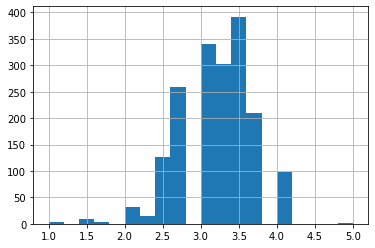

In [24]:
print (df['Rating'].shape) # here we have the total number of rows
print (df['Rating'].count()) # count will give all non na values

# we can also examine the distribution of ratings by plotting the histogram
df['Rating'].hist(bins=20)

### Q2: How many types of Bar or Specific Bean Origin are there?

In [26]:
df['Specific Bean Origin\nor Bar Name'].unique().shape # by calling unique, we get remove any duplicates from the same category

(1039,)

### Q3: Which country makes the most chocolate in this dataset?


In [10]:
# enter your code for finding the country which makes the most chocolate
country = df.columns[-1]

<AxesSubplot:>

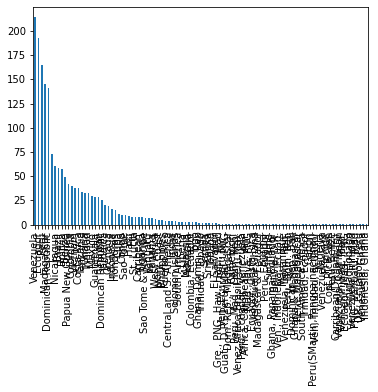

In [27]:
df['Broad Bean\nOrigin'].value_counts().plot(kind='bar') # value counts tallies the counts for each category and we can plot this as a bar graph

<AxesSubplot:>

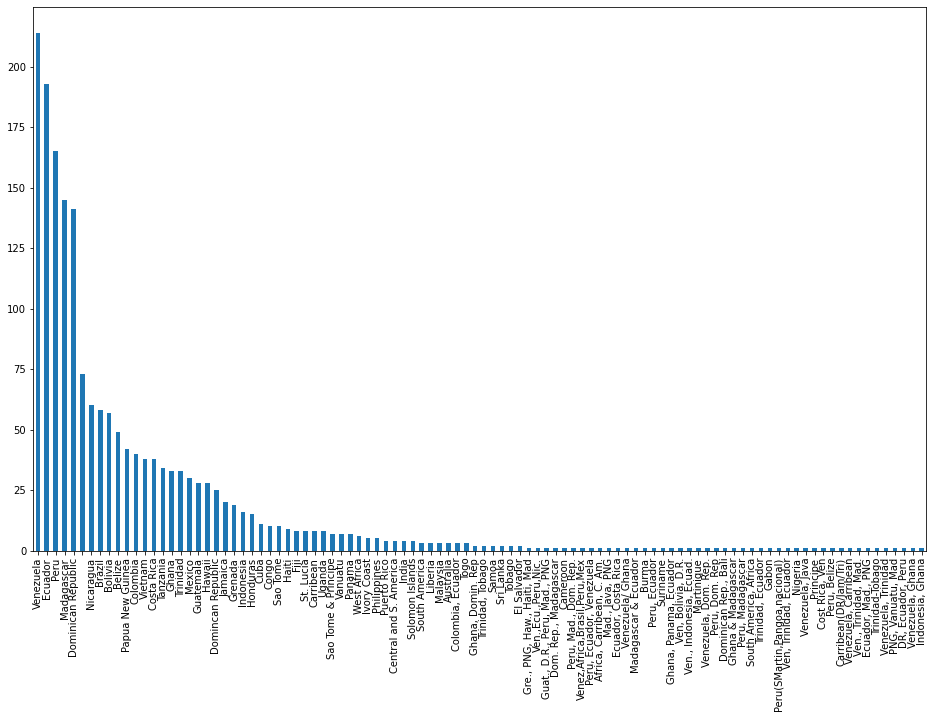

In [28]:
# lets make it bigger so we can read the labels
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
df['Broad Bean\nOrigin'].value_counts().plot(kind='bar')

### Q4: Which countries produce the highest-rated bars?


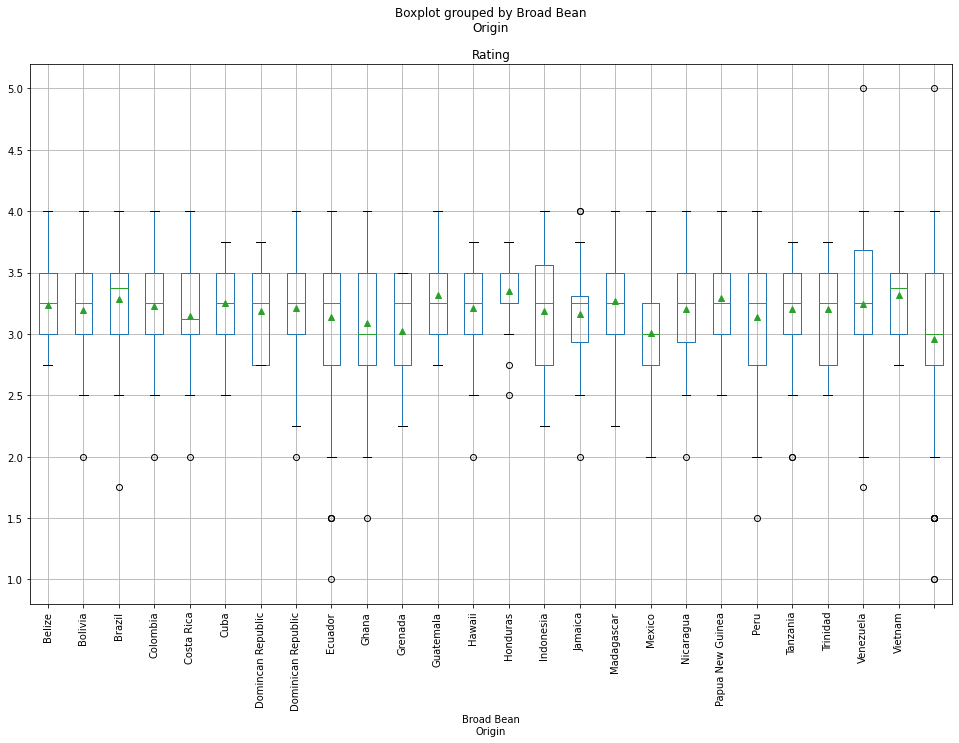

In [30]:

# some countries have very few ratings...
# let's subset our dataframe to include 
# only countries that have more than 10 ratings

subset = df['Broad Bean\nOrigin'].value_counts()[df['Broad Bean\nOrigin'].value_counts() > 10]
subset.index

subset_df = df[df['Broad Bean\nOrigin'].isin(list(subset.index))]

plot = subset_df.boxplot('Rating', by='Broad Bean\nOrigin', figsize=(16,10), showmeans=True)
plt.xticks(rotation=90)
plt.show()

In [32]:
subset_df.groupby(country).mean()['Rating'].sort_values(ascending=False)

Broad Bean\nOrigin
Honduras              3.350000
Guatemala             3.321429
Vietnam               3.315789
Papua New Guinea      3.291667
Brazil                3.284483
Madagascar            3.265517
Cuba                  3.250000
Venezuela             3.245327
Belize                3.234694
Colombia              3.225000
Hawaii                3.214286
Dominican Republic    3.209220
Tanzania              3.205882
Trinidad              3.204545
Nicaragua             3.200000
Bolivia               3.197368
Domincan Republic     3.190000
Indonesia             3.187500
Jamaica               3.162500
Costa Rica            3.144737
Peru                  3.137879
Ecuador               3.134715
Ghana                 3.090909
Grenada               3.026316
Mexico                3.008333
                      2.955479
Name: Rating, dtype: float64

### Q5: What’s the relationship between cocoa solids percentage and rating?


<AxesSubplot:xlabel='Cocoa\nPercent', ylabel='Rating'>

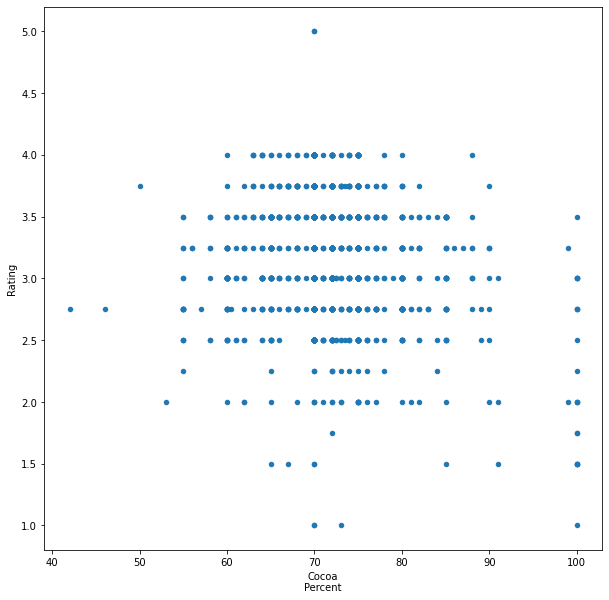

In [34]:
df.plot.scatter('Cocoa\nPercent','Rating', figsize=(10,10))